In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
data.rename(columns = {'Whole weight': 'Whole_weight', 'Shucked weight':'Shucked_weight', 'Viscera weight':'Viscera_weight', 'Shell weight':'Shell_weight'}, inplace = True)

data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [6]:
data.shape

(4177, 9)

In [7]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


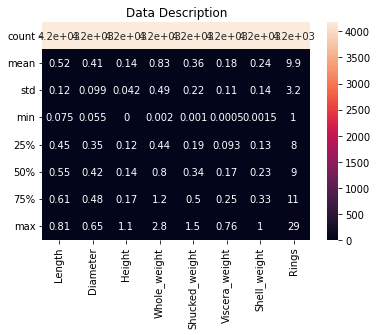

In [8]:
sns.heatmap(data.describe(), annot=True)

plt.title("Data Description")
plt.show()

In [9]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1, 1))

In [12]:
data.shape

(4177, 9)

In [13]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
data['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

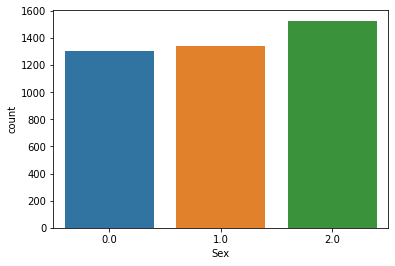

In [15]:
sns.countplot(x = 'Sex', data = data)

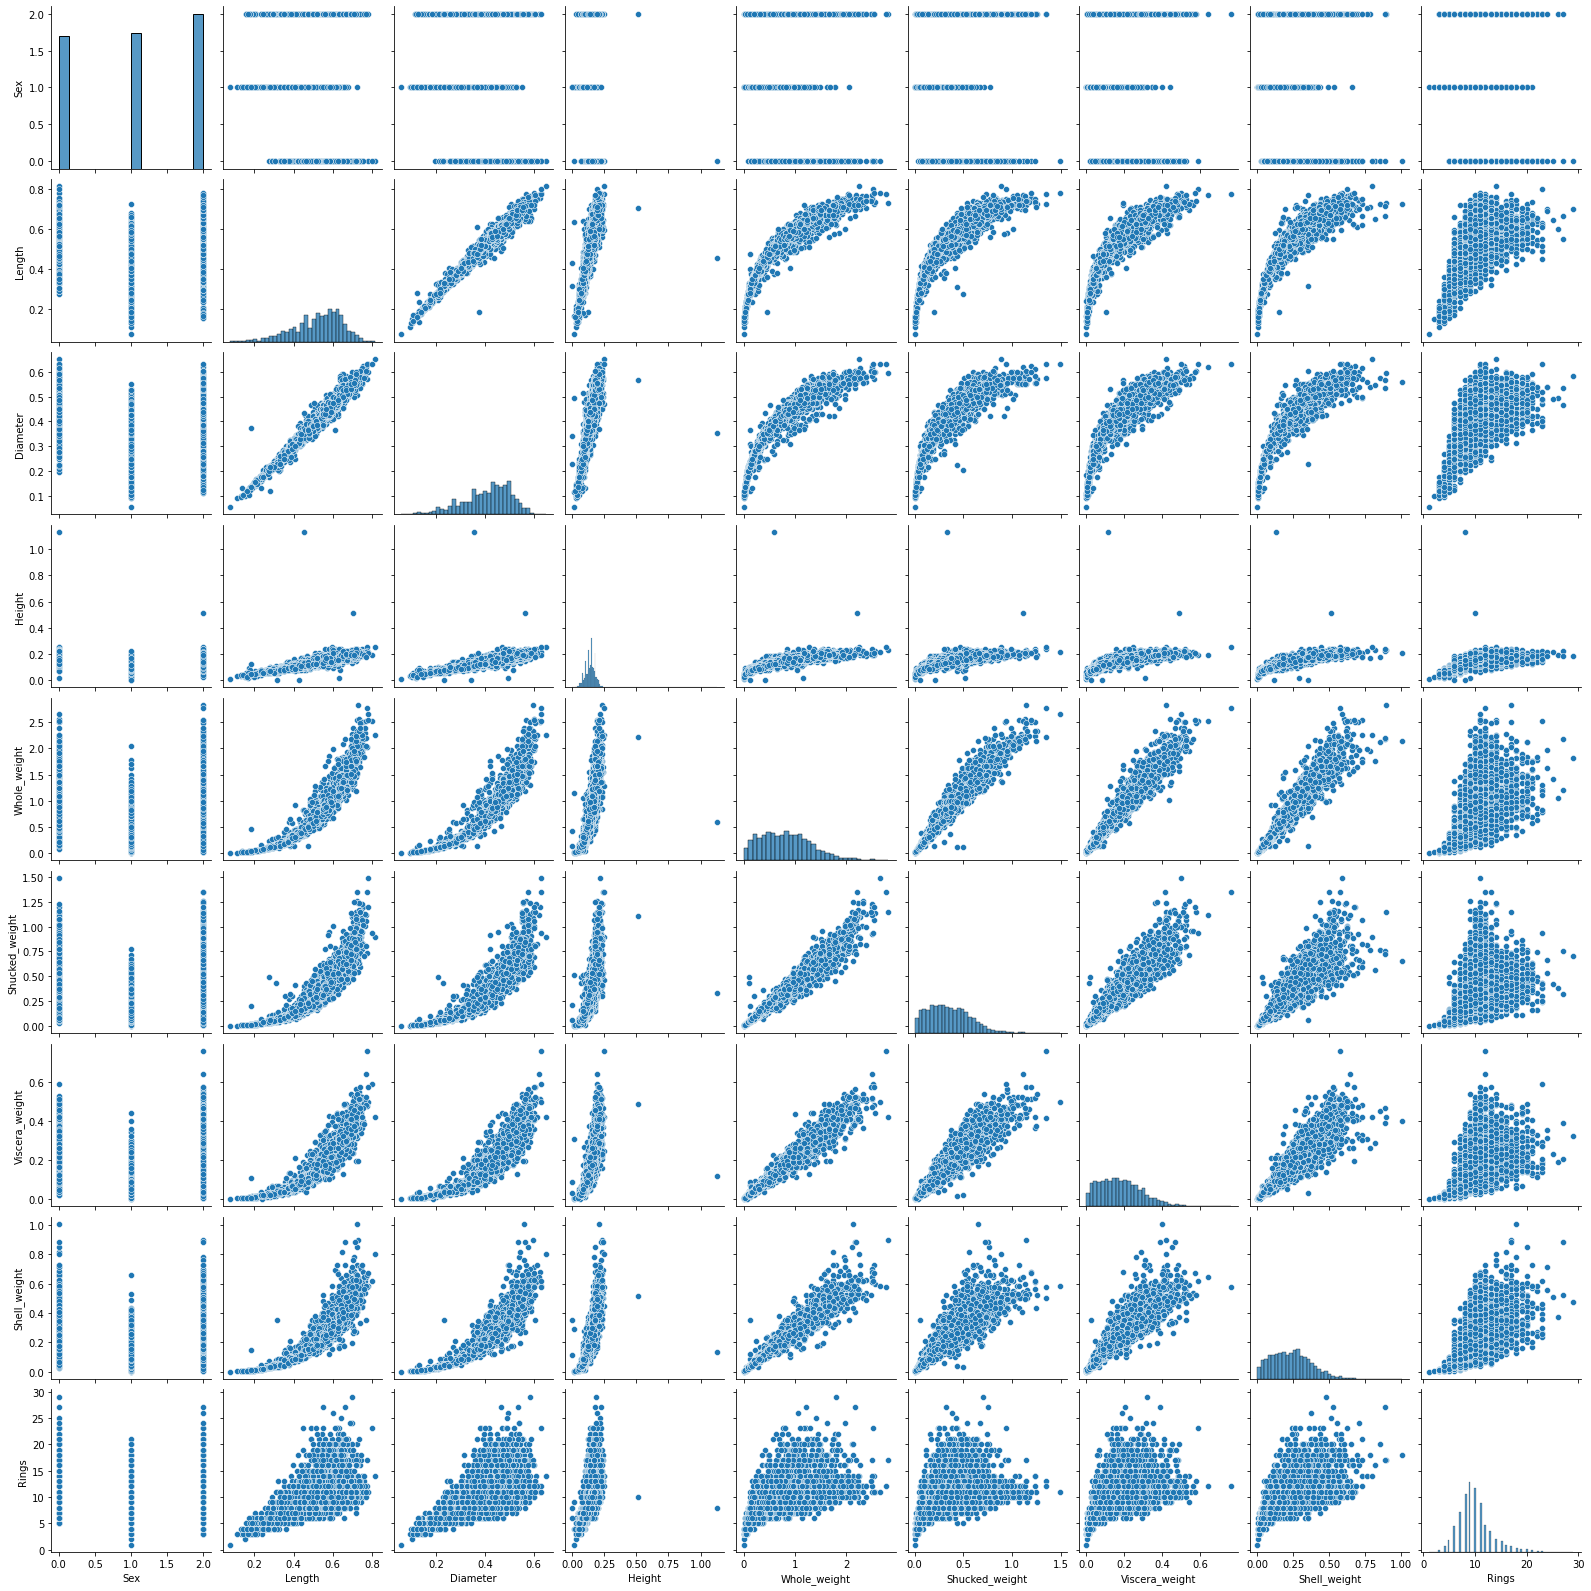

In [16]:
# pairplot

sns.pairplot(data)

From our dataset, we can easily categories the complete Dataset into 3 Categories:
 1. Sex Data
 2. Size Data - i.e. Length, Diameter and Height
 3. Weight Data - i.e. Whole_weight, Shucked_weight, Viscera_weight and Shell_weight

Now, Let's check the relationship of Rings with data according to categories

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

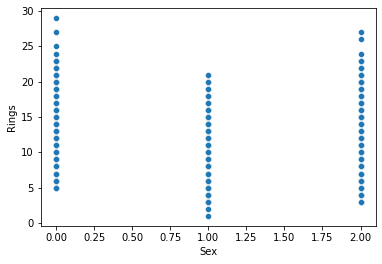

In [17]:
# Rings vs Sex Data

sns.scatterplot(x ='Sex', y='Rings', data = data)

We can see the Sex is equally distributed for all three categories.

<AxesSubplot:xlabel='Length', ylabel='Rings'>

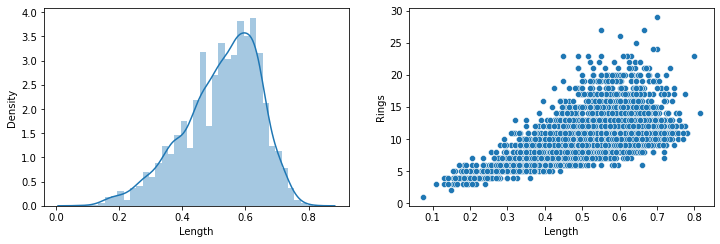

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Length']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Length', y='Rings', data = data)

There seems to be an almost normal distribution with skewness.

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

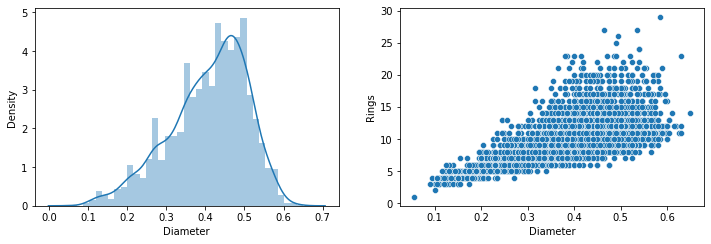

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Diameter']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Diameter', y='Rings', data = data)

There seems to be an almost normal distribution with skewness.

<AxesSubplot:xlabel='Height', ylabel='Rings'>

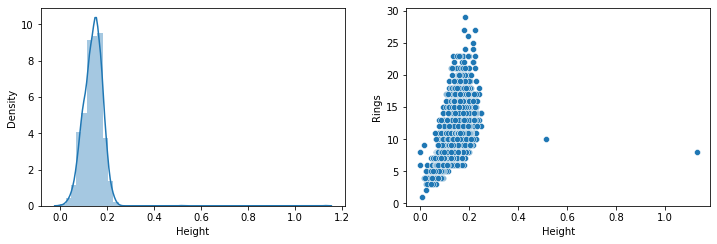

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Height']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Height', y='Rings', data = data)

There is a huge peak in Height column, which is due to the outliers present in the Dataset. Let's drop these outliers and check the distribution.

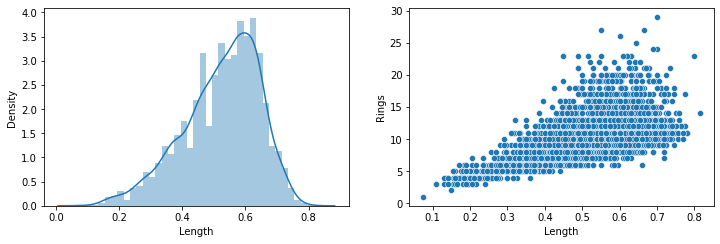

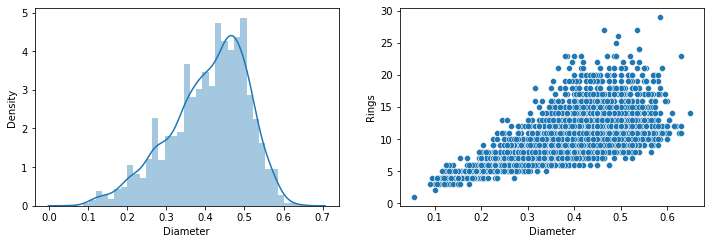

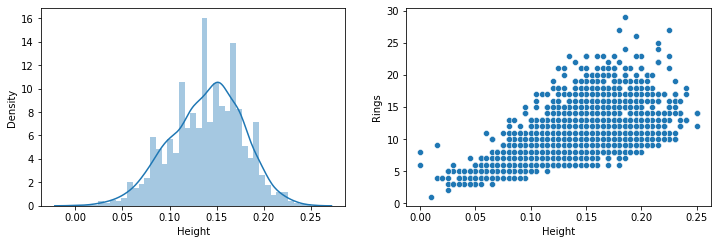

In [21]:
data = data[data['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Length']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Length', y='Rings', data = data)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Diameter']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Diameter', y='Rings', data = data)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Height']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Height', y='Rings', data = data)
plt.show()

Now the dataset looks more normalized.

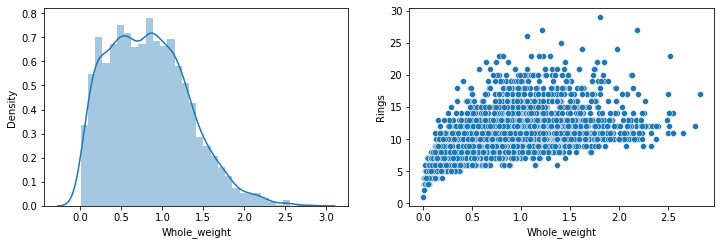

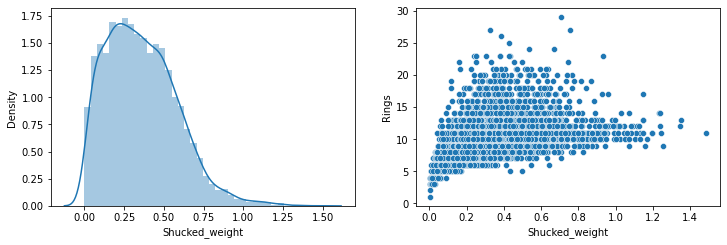

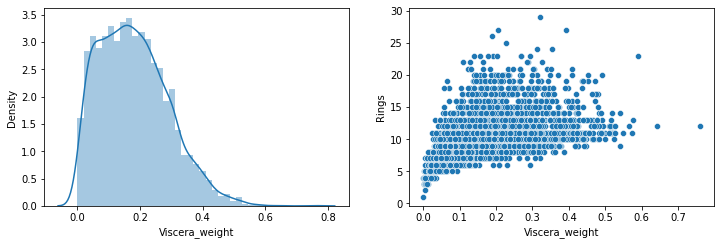

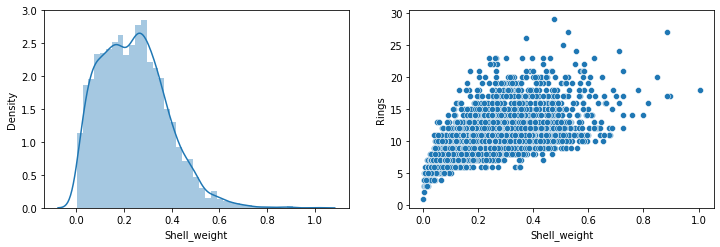

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Whole_weight']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Whole_weight', y='Rings', data = data)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Shucked_weight']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Shucked_weight', y='Rings', data = data)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Viscera_weight']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Viscera_weight', y='Rings', data = data)
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Shell_weight']);
plt.subplot(2,2,2)
sns.scatterplot(x ='Shell_weight', y='Rings', data = data)
plt.show()

There seems to be an almost normal distribution with skewness.

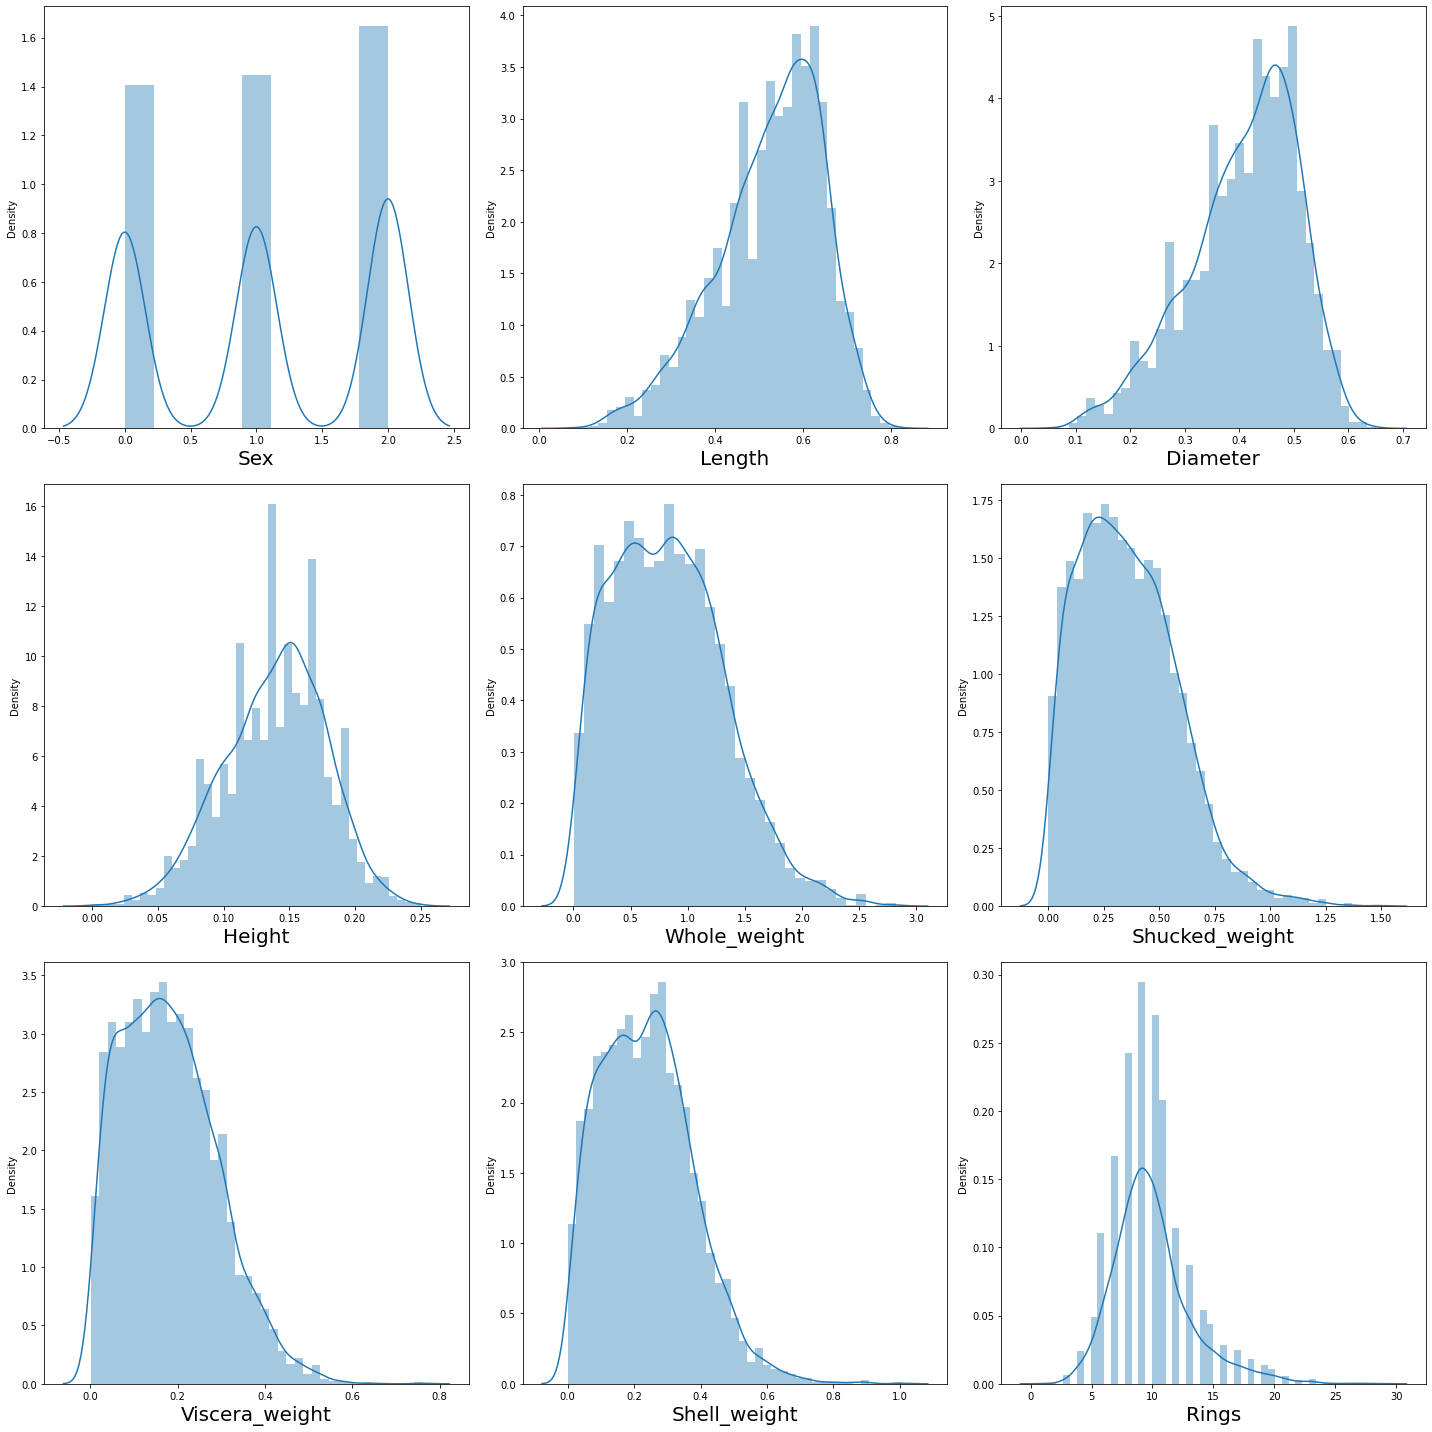

In [23]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [24]:
x = data.drop(columns = ['Rings'])
y = data['Rings']

In [25]:
x.skew().sort_values(ascending = False)

Shucked_weight    0.715003
Shell_weight      0.620924
Viscera_weight    0.589856
Whole_weight      0.528732
Sex              -0.098192
Height           -0.264536
Diameter         -0.609823
Length           -0.640423
dtype: float64

There is skewness in columns, ranging from -0.6 to +0.71, therefore using power_transform function to remove skewness.

In [26]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [27]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Viscera_weight    0.039631
Shucked_weight    0.027249
Shell_weight      0.023307
Whole_weight     -0.004135
Height           -0.010804
Diameter         -0.066053
Length           -0.066708
Sex              -0.176445
dtype: float64

Now the skewness is removed.

In [28]:
x = pd.DataFrame(x_new, columns = x.columns)

x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.127187,-0.685457,-0.549816,-1.143244,-0.576762,-0.540924,-0.693270,-0.587724
1,1.127187,-1.396271,-1.387256,-1.259655,-1.351577,-1.311389,-1.332801,-1.332363
2,-1.308105,-0.070642,0.008692,-0.156766,-0.198040,-0.366037,-0.255094,-0.098115
3,1.127187,-0.797247,-0.549816,-0.412761,-0.571889,-0.591606,-0.547772,-0.544842
4,-0.009560,-1.513702,-1.459566,-1.488013,-1.412932,-1.379889,-1.451558,-1.485467


In [29]:
x.skew()[np.abs(x.skew())<0.20].all()

True

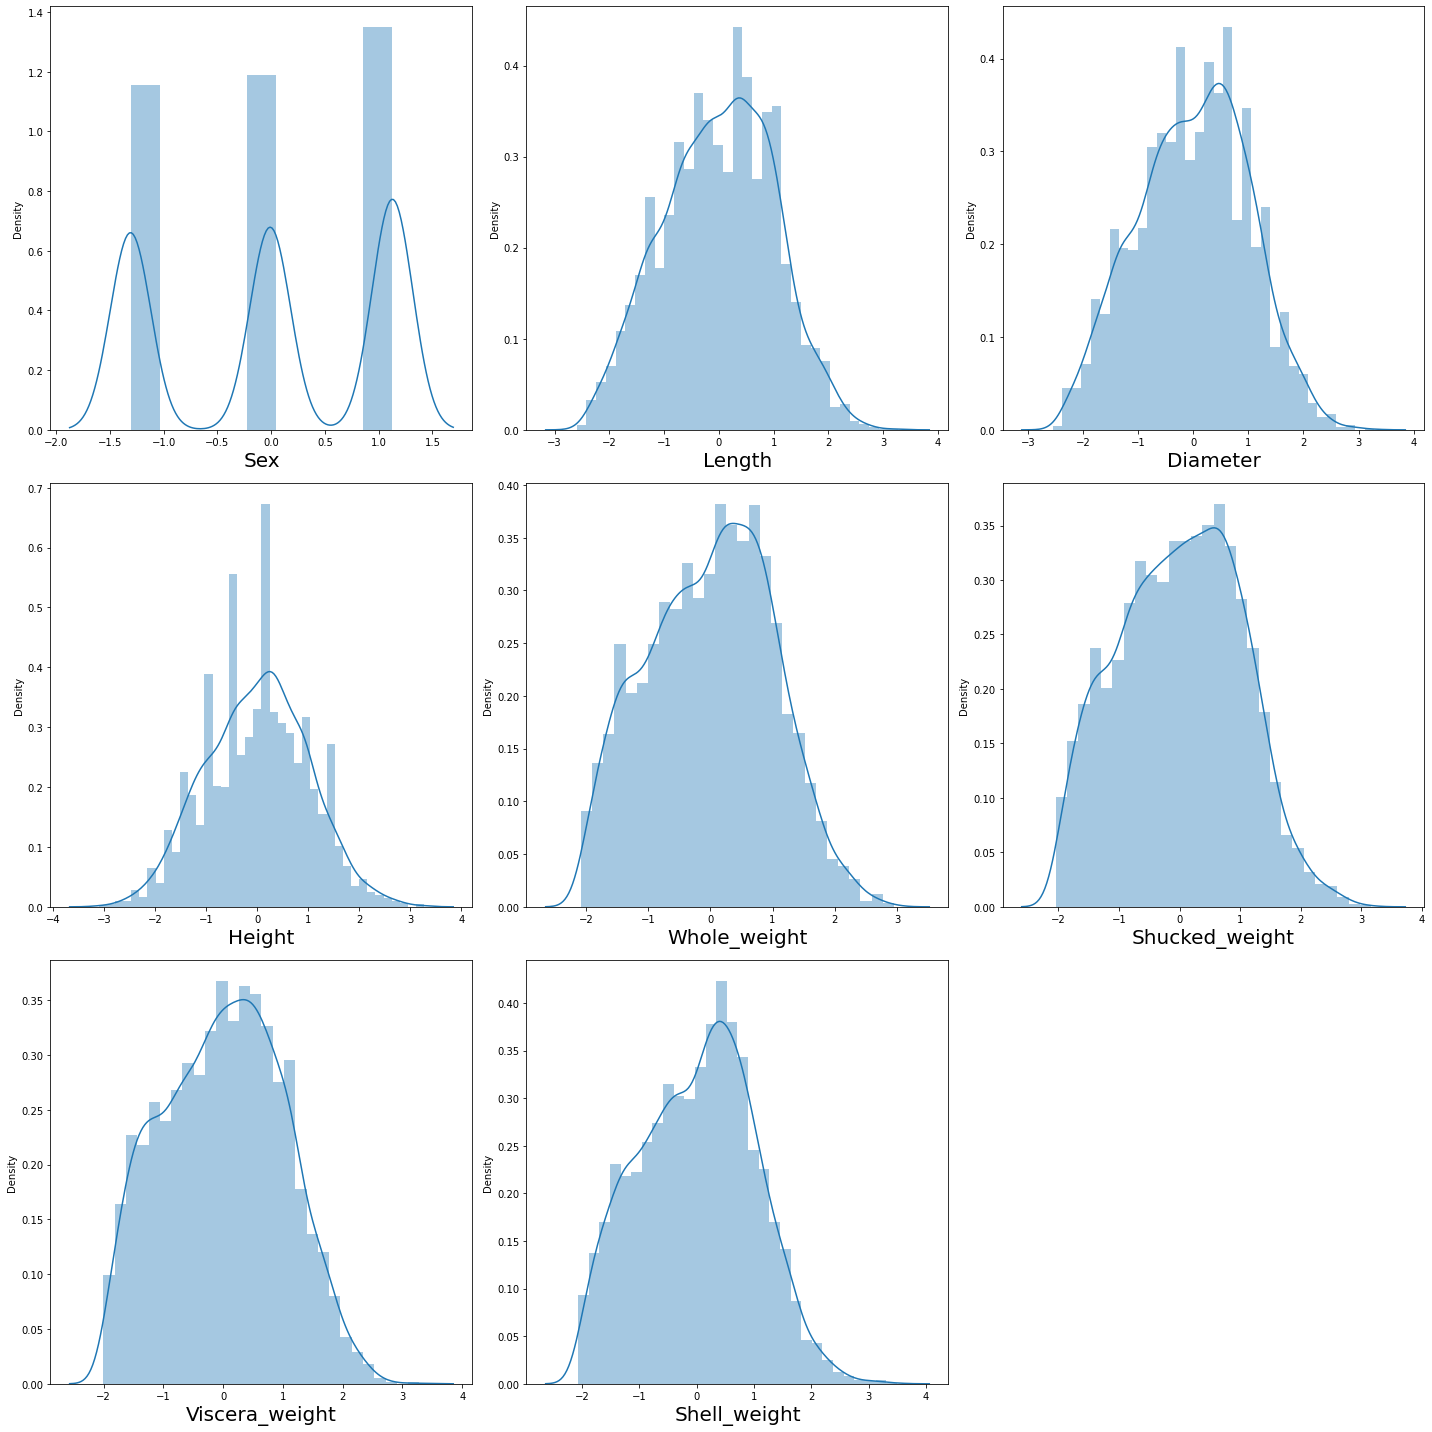

In [30]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

After removal of skewness from the data, it looks perfectly normalized.

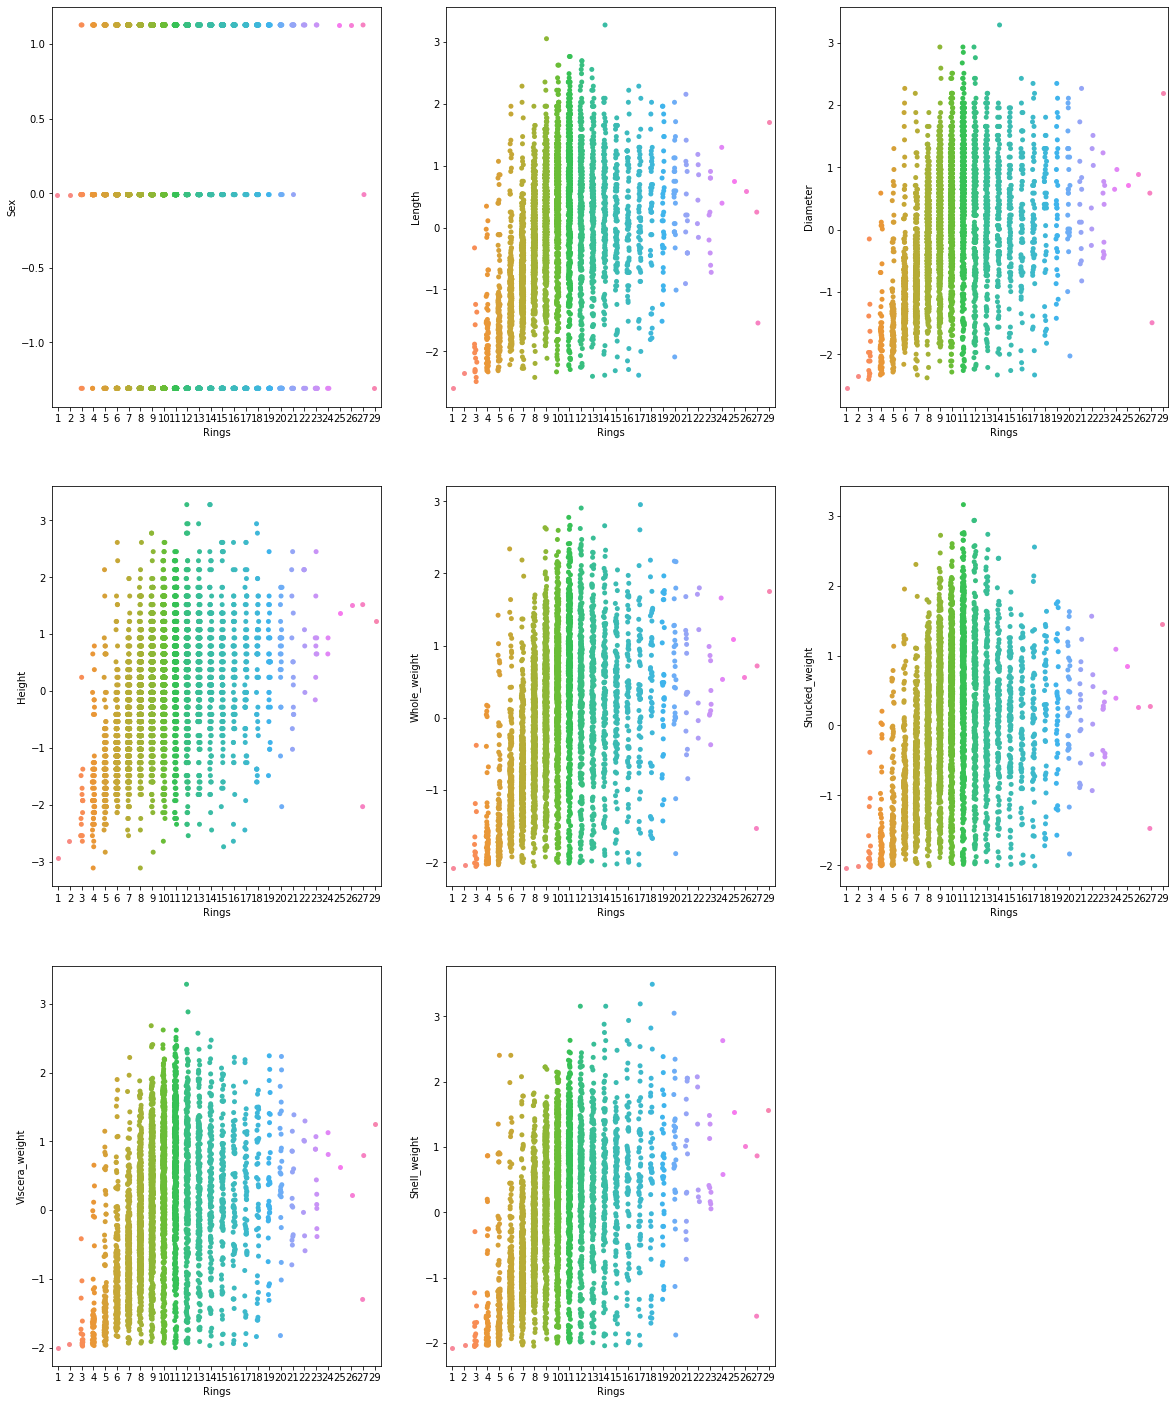

In [31]:
plt.figure(figsize=(20,25))
fignumber = 1

for column in x:
    if fignumber <= 9:
        ax = plt.subplot(3,3,fignumber)
        sns.stripplot(y,x[column])
        
    fignumber +=1
plt.show()

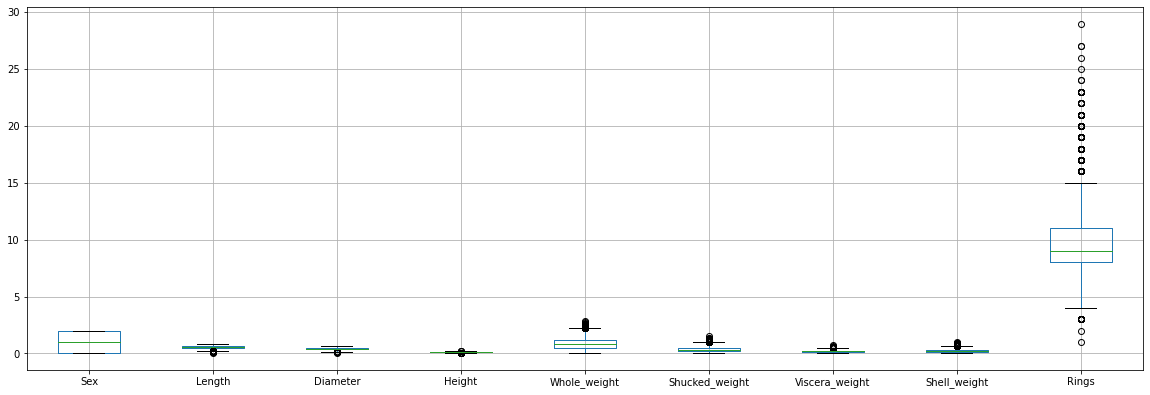

In [32]:
# checking Outliers

data.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

there are some outliers present in the data, therefore we need to remove the outliers before proceeding furthur.

In [33]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Sex                True
Length            False
Diameter          False
Height            False
Whole_weight       True
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
dtype: bool

Apart from column Sex and Whole_weight, the outliers are present in all other features.

In [34]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [35]:
Length_high = q3.Length + (1.5 * iqr.Length)

# Check the Indexes which have higher values

index1 = np.where(x['Length']> Length_high)

x = x.drop(x['Length'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(4173, 8)
(4173,)


In [36]:
Diameter_high = q3.Diameter + (1.5 * iqr.Diameter)

# Check the Indexes which have higher values

index2 = np.where(x['Diameter']> Diameter_high)

x = x.drop(x['Diameter'].index[index2])

y = y.drop(y.index[index2])

print(x.shape)
print(y.shape)

(4170, 8)
(4170,)


In [37]:
Height_high = q3.Height + (1.5 * iqr.Height)

# Check the Indexes which have higher values

index3 = np.where(x['Height']> Height_high)

x = x.drop(x['Height'].index[index3])

y = y.drop(y.index[index3])

print(x.shape)
print(y.shape)

(4159, 8)
(4159,)


In [38]:
Height_low = q1.Height - (1.5 * iqr.Height)

# Check the Indexes which have higher values

index4 = np.where(x['Height']< Height_low)

x = x.drop(x['Height'].index[index4])

y = y.drop(y.index[index4])

print(x.shape)
print(y.shape)

(4147, 8)
(4147,)


In [39]:
Shucked_weight_high = q3.Shucked_weight + (1.5 * iqr.Shucked_weight)

# Check the Indexes which have higher values

index5 = np.where(x['Shucked_weight']> Shucked_weight_high)

x = x.drop(x['Shucked_weight'].index[index5])

y = y.drop(y.index[index5])

print(x.shape)
print(y.shape)

(4147, 8)
(4147,)


In [40]:
Viscera_weight_high = q3.Viscera_weight + (1.5 * iqr.Viscera_weight)

# Check the Indexes which have higher values

index6 = np.where(x['Viscera_weight']> Viscera_weight_high)

x = x.drop(x['Viscera_weight'].index[index6])

y = y.drop(y.index[index6])

print(x.shape)
print(y.shape)

(4147, 8)
(4147,)


In [41]:
Shell_weight_high = q3.Shell_weight + (1.5 * iqr.Shell_weight)

# Check the Indexes which have higher values

index7 = np.where(x['Shell_weight']> Shell_weight_high)

x = x.drop(x['Shell_weight'].index[index7])

y = y.drop(y.index[index7])

print(x.shape)
print(y.shape)

(4143, 8)
(4143,)


In [42]:
(np.abs(zscore(x))<3).all()

Sex               True
Length            True
Diameter          True
Height            True
Whole_weight      True
Shucked_weight    True
Viscera_weight    True
Shell_weight      True
dtype: bool

Now the Outliers from the data is removed. Let's Check the loss of data due to outliers removal.

In [43]:
# Percentage Data Loss

loss = (((4177 - 4143)/4177)*100)

print(loss)

0.8139813263107494


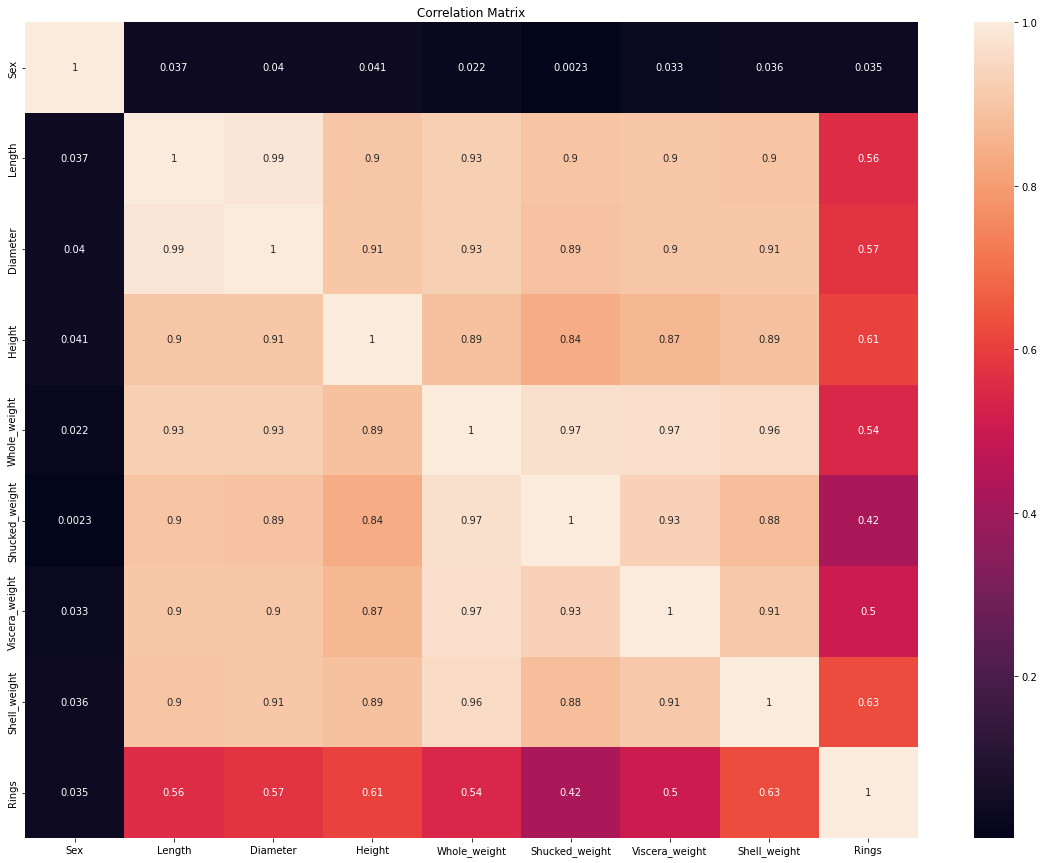

In [44]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))

sns.heatmap(data_corr, annot=True)

plt.title("Correlation Matrix")
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

Checking Multicollinearity in data using VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.013136,Sex
1,36.532223,Length
2,34.961555,Diameter
3,7.120299,Height
4,142.414406,Whole_weight
5,37.341988,Shucked_weight
6,22.703982,Viscera_weight
7,31.292971,Shell_weight


AS the value of VIF is very happy that means, There is a strong correlation between features. Therefore removing the feature with heighest VIF values and then will see the variation in VIF.

In [47]:
x_new = x.drop(columns = ['Whole_weight'], axis=1)

x_new.head()

,Sex,Length,Diameter,Height,Shucked_weight,Viscera_weight,Shell_weight
0,1.127187,-0.685457,-0.549816,-1.143244,-0.540924,-0.693270,-0.587724
1,1.127187,-1.396271,-1.387256,-1.259655,-1.311389,-1.332801,-1.332363
2,-1.308105,-0.070642,0.008692,-0.156766,-0.366037,-0.255094,-0.098115
3,1.127187,-0.797247,-0.549816,-0.412761,-0.591606,-0.547772,-0.544842
4,-0.009560,-1.513702,-1.459566,-1.488013,-1.379889,-1.451558,-1.485467


In [48]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_new)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x_new.columns


# Lets check the values 
vif

,vif,features
0,1.013095,Sex
1,36.460670,Length
2,34.914011,Diameter
3,7.093305,Height
4,14.427226,Shucked_weight
5,15.104975,Viscera_weight
6,15.424919,Shell_weight


As it can be easily seen that there is a significant drop in VIF value, but still it is high, therefore removing the other feature with High vif value i.e. Length.

In [50]:
x_new = x_new.drop(columns = ['Diameter'], axis=1)

x_new.head()

,Sex,Length,Height,Shucked_weight,Viscera_weight,Shell_weight
0,1.127187,-0.685457,-1.143244,-0.540924,-0.693270,-0.587724
1,1.127187,-1.396271,-1.259655,-1.311389,-1.332801,-1.332363
2,-1.308105,-0.070642,-0.156766,-0.366037,-0.255094,-0.098115
3,1.127187,-0.797247,-0.412761,-0.591606,-0.547772,-0.544842
4,-0.009560,-1.513702,-1.488013,-1.379889,-1.451558,-1.485467


In [51]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_new)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x_new.columns


# Lets check the values 
vif

,vif,features
0,1.011945,Sex
1,19.775818,Length
2,7.062691,Height
3,14.229230,Shucked_weight
4,15.102324,Viscera_weight
5,14.106302,Shell_weight


VIF values are reduced compared to earlier, and it ranges below 20 therefore, proceeding ahead with dataset

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    r2_score = reg.score(x_test,y_test)
    print('r2_score', r2_score*100,'%', 'random_state', i)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 52.73086536793128 % random_state 1
r2_score 52.73086536793128 % random_state 1
r2_score 48.651962002760115 % random_state 2
r2_score 50.472846378804704 % random_state 3
r2_score 46.39306278610093 % random_state 4
r2_score 47.12873987375153 % random_state 5
r2_score 51.03077558505176 % random_state 6
r2_score 46.07995766439764 % random_state 7
r2_score 52.79811888773808 % random_state 8
r2_score 52.79811888773808 % random_state 8
r2_score 51.749224846196576 % random_state 9
r2_score 50.770319488849225 % random_state 10
r2_score 51.870985670953154 % random_state 11
r2_score 48.77155175319914 % random_state 12
r2_score 51.614293828542266 % random_state 13
r2_score 49.91527857800714 % random_state 14
r2_score 52.50284429437604 % random_state 15
r2_score 49.43058908180687 % random_state 16
r2_score 49.514168590343985 % random_state 17
r2_score 53.366807052455776 % random_state 18
r2_score 53.366807052455776 % random_state 18
r2_score 53.064352106616596 % random_state 19
r2_score 48

r2_score 53.206908567203925 % random_state 197
r2_score 53.340854463055365 % random_state 198
r2_score 46.93595775290458 % random_state 199
r2_score 49.91070386294783 % random_state 200
r2_score 53.52749383408742 % random_state 201
r2_score 50.736388677247 % random_state 202
r2_score 53.37522432131656 % random_state 203
r2_score 50.69443102242999 % random_state 204
r2_score 54.612223028709565 % random_state 205
r2_score 53.1180156049466 % random_state 206
r2_score 48.737420602859935 % random_state 207
r2_score 54.595178511187335 % random_state 208
r2_score 51.70526324091721 % random_state 209
r2_score 49.936883350668474 % random_state 210
r2_score 53.14792019536662 % random_state 211
r2_score 52.68461824800338 % random_state 212
r2_score 51.336103245766154 % random_state 213
r2_score 51.92502215928284 % random_state 214
r2_score 53.509372064040164 % random_state 215
r2_score 52.45133993161375 % random_state 216
r2_score 52.91769961046733 % random_state 217
r2_score 52.19410383295979 % 

r2_score 50.414400104787774 % random_state 399
r2_score 48.53517550058931 % random_state 400
r2_score 48.00697441162498 % random_state 401
r2_score 48.239005594648255 % random_state 402
r2_score 51.85343203716262 % random_state 403
r2_score 52.92311525513759 % random_state 404
r2_score 55.445668845362064 % random_state 405
r2_score 54.60885569325742 % random_state 406
r2_score 52.01512657062728 % random_state 407
r2_score 51.047415906446126 % random_state 408
r2_score 54.51472276333094 % random_state 409
r2_score 52.625200798616525 % random_state 410
r2_score 56.10036978051306 % random_state 411
r2_score 52.50398512856842 % random_state 412
r2_score 52.87486581191647 % random_state 413
r2_score 50.89188199254446 % random_state 414
r2_score 49.40525202848822 % random_state 415
r2_score 50.09025373147467 % random_state 416
r2_score 52.004543716352416 % random_state 417
r2_score 51.69470411725629 % random_state 418
r2_score 47.92093278290206 % random_state 419
r2_score 52.22796389908122 %

r2_score 50.26240878565116 % random_state 605
r2_score 47.843447647476445 % random_state 606
r2_score 52.21183689214153 % random_state 607
r2_score 48.53688411909749 % random_state 608
r2_score 46.458256331891 % random_state 609
r2_score 53.10388155319683 % random_state 610
r2_score 53.01297524285084 % random_state 611
r2_score 51.994443501038965 % random_state 612
r2_score 53.397995478228935 % random_state 613
r2_score 49.16491269691892 % random_state 614
r2_score 51.79278131288613 % random_state 615
r2_score 50.47227220515869 % random_state 616
r2_score 52.782517759322545 % random_state 617
r2_score 51.840993201055106 % random_state 618
r2_score 50.00350080375699 % random_state 619
r2_score 52.49575160590164 % random_state 620
r2_score 52.59525648748544 % random_state 621
r2_score 49.337160134881906 % random_state 622
r2_score 51.58210596084732 % random_state 623
r2_score 53.98786082371559 % random_state 624
r2_score 50.6936283478152 % random_state 625
r2_score 50.783852054867836 % r

r2_score 52.23611466054923 % random_state 814
r2_score 48.586627021934994 % random_state 815
r2_score 51.54773065963282 % random_state 816
r2_score 54.53081593779383 % random_state 817
r2_score 50.03973192653683 % random_state 818
r2_score 53.5274944489452 % random_state 819
r2_score 47.851502784149844 % random_state 820
r2_score 50.69231875163068 % random_state 821
r2_score 53.998004779516265 % random_state 822
r2_score 51.32080217725783 % random_state 823
r2_score 49.84982090928028 % random_state 824
r2_score 51.5609206128688 % random_state 825
r2_score 50.248511262713876 % random_state 826
r2_score 52.33091157341716 % random_state 827
r2_score 50.79924518552508 % random_state 828
r2_score 51.71428300498204 % random_state 829
r2_score 52.68888694739944 % random_state 830
r2_score 49.75738929085147 % random_state 831
r2_score 54.70655374380342 % random_state 832
r2_score 50.78929068754323 % random_state 833
r2_score 50.87440353503414 % random_state 834
r2_score 50.03578009576499 % ran

r2_score 49.64187291050981 % random_state 995
r2_score 51.29611357299873 % random_state 996
r2_score 46.205280600558964 % random_state 997
r2_score 55.94831946777417 % random_state 998
r2_score 52.585489251133446 % random_state 999


In [54]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.5720102005068854 on Random_state 569


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 569)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3107, 6)
(1036, 6)
(3107,)
(1036,)


In [56]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [57]:
reg.score(x_test, y_test)

0.5720102005068854

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

print("The Model Testing Accuracy is: ", r2_score(y_test, y_pred))

Mean Absolute Error:  1.5279076520514032
Mean Squared Error:  4.288332611513038
Square Root of Mean Square Error:  2.0708289672285924
The Model Testing Accuracy is:  0.5720102005068854


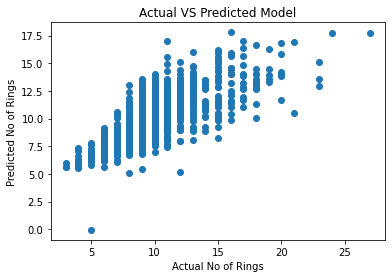

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual No of Rings')
plt.ylabel('Predicted No of Rings')
plt.title('Actual VS Predicted Model')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(reg, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

At CV: 2
Cross Validation Score is:  53.10201824671799
R2_Score is :  0.5720102005068854
At CV: 3
Cross Validation Score is:  51.14899190504113
R2_Score is :  0.5720102005068854
At CV: 4
Cross Validation Score is:  43.97305677186325
R2_Score is :  0.5720102005068854
At CV: 5
Cross Validation Score is:  41.89334075497969
R2_Score is :  0.5720102005068854
At CV: 6
Cross Validation Score is:  43.52903835916982
R2_Score is :  0.5720102005068854
At CV: 7
Cross Validation Score is:  45.22803289260641
R2_Score is :  0.5720102005068854
At CV: 8
Cross Validation Score is:  39.10550988303967
R2_Score is :  0.5720102005068854
At CV: 9
Cross Validation Score is:  43.023335255922056
R2_Score is :  0.5720102005068854


In [61]:
cvscore_selected = cross_val_score(reg, x, y, cv = 2).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5310201824671799 
The R2_Score is:  0.5720102005068854


In [62]:
from sklearn import svm

regr = svm.SVR()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(regr, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.5652631836572344
Mean Squared Error:  4.355935746964054
At CV: 2
Cross Validation Score is:  52.10405672758045
R2_Score is :  0.5652631836572344
At CV: 3
Cross Validation Score is:  52.49328595475543
R2_Score is :  0.5652631836572344
At CV: 4
Cross Validation Score is:  49.451328261916025
R2_Score is :  0.5652631836572344
At CV: 5
Cross Validation Score is:  48.44597850022122
R2_Score is :  0.5652631836572344
At CV: 6
Cross Validation Score is:  49.397323208454075
R2_Score is :  0.5652631836572344
At CV: 7
Cross Validation Score is:  50.05712026435162
R2_Score is :  0.5652631836572344
At CV: 8
Cross Validation Score is:  48.283016866877674
R2_Score is :  0.5652631836572344
At CV: 9
Cross Validation Score is:  49.43638486722654
R2_Score is :  0.5652631836572344


In [63]:
cvscore_selected = cross_val_score(regr, x, y, cv = 3).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5249328595475543 
The R2_Score is:  0.5652631836572344


In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(knn, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.48569310790142406
Mean Squared Error:  5.153204633204633
At CV: 2
Cross Validation Score is:  45.73846340381905
R2_Score is :  0.48569310790142406
At CV: 3
Cross Validation Score is:  45.086383508041656
R2_Score is :  0.48569310790142406
At CV: 4
Cross Validation Score is:  39.780685734956066
R2_Score is :  0.48569310790142406
At CV: 5
Cross Validation Score is:  38.51297928243203
R2_Score is :  0.48569310790142406
At CV: 6
Cross Validation Score is:  40.00539006635096
R2_Score is :  0.48569310790142406
At CV: 7
Cross Validation Score is:  41.65579152216915
R2_Score is :  0.48569310790142406
At CV: 8
Cross Validation Score is:  37.204924159413224
R2_Score is :  0.48569310790142406
At CV: 9
Cross Validation Score is:  39.4309939081362
R2_Score is :  0.48569310790142406


In [65]:
cvscore_selected = cross_val_score(knn, x, y, cv = 2).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.45738463403819046 
The R2_Score is:  0.48569310790142406


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(rf, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.5361276328905632
Mean Squared Error:  4.647865444015443
At CV: 2
Cross Validation Score is:  52.55527049029748
R2_Score is :  0.5361276328905632
At CV: 3
Cross Validation Score is:  50.84051517372794
R2_Score is :  0.5361276328905632
At CV: 4
Cross Validation Score is:  44.37116439555245
R2_Score is :  0.5361276328905632
At CV: 5
Cross Validation Score is:  43.39567842523414
R2_Score is :  0.5361276328905632
At CV: 6
Cross Validation Score is:  44.10190163660299
R2_Score is :  0.5361276328905632
At CV: 7
Cross Validation Score is:  46.11387322152015
R2_Score is :  0.5361276328905632
At CV: 8
Cross Validation Score is:  40.844239121269055
R2_Score is :  0.5361276328905632
At CV: 9
Cross Validation Score is:  44.46571179530177
R2_Score is :  0.5361276328905632


In [67]:
cvscore_selected = cross_val_score(rf, x, y, cv = 2).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5241878018367265 
The R2_Score is:  0.5361276328905632


In [68]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(xgb, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.5038900083755873
Mean Squared Error:  4.97087701272342
At CV: 2
Cross Validation Score is:  46.28531749106586
R2_Score is :  0.5038900083755873
At CV: 3
Cross Validation Score is:  45.94132626311323
R2_Score is :  0.5038900083755873
At CV: 4
Cross Validation Score is:  38.266878139327574
R2_Score is :  0.5038900083755873
At CV: 5
Cross Validation Score is:  37.32601982968696
R2_Score is :  0.5038900083755873
At CV: 6
Cross Validation Score is:  38.79526616330728
R2_Score is :  0.5038900083755873
At CV: 7
Cross Validation Score is:  42.09078467324176
R2_Score is :  0.5038900083755873
At CV: 8
Cross Validation Score is:  34.29407317718314
R2_Score is :  0.5038900083755873
At CV: 9
Cross Validation Score is:  40.767673458167515
R2_Score is :  0.5038900083755873


In [69]:
cvscore_selected = cross_val_score(xgb, x, y, cv = 2).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.46285317491065864 
The R2_Score is:  0.5038900083755873


Linear Regression Model is Having Best r2 score value.

#### Model Regularization using Lasso and Ridge Methods

In [70]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [71]:
# best alpha parameter

alpha = lasscv.alpha_

alpha

0.00020295787774069342

In [72]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00020295787774069342)

In [73]:
lasso_reg.score(x_test,y_test)

0.5720047118827105

#### Ridge Model

In [74]:
# Ridge Model

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [75]:
alpha = ridgecv.alpha_

alpha

0.001

In [76]:
ridge_model = Ridge(alpha)

ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [77]:
ridge_model.score(x_test,y_test)

0.5720101139073389

- Since, Linear Regression and Ridge Model Both have the same model accuracy score, therefore using linear regression as our Final Model for performing GridSearchCV

# Hyper Parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {'copy_X': [True,False],
              'fit_intercept': [True,False],
              'normalize': [True,False]}

grd = GridSearchCV(reg, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

reg = grd.best_estimator_

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
R2 Score:  0.5720102005068854
Mean Squared Error:  4.288332611513038


In [79]:
# Saving the Model

import joblib
joblib.dump(reg, "Abalone_Case_Study.pkl")

['Abalone_Case_Study.pkl']